In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import date



symbols  = [ 'SPY', "QQQ", "VGK", "SCZ", "EWJ", "EEM", #eq
           'REM', "VNQ", "RWX", # re
           'TIP', "IEF", "TLT", "BWX", #fi
           'DBC', "GLD", #como
           'twtr', 'intc', 'tsm',"VWUSX", "Amc"]

all_stocks = pd.DataFrame()
 
for symbol in symbols:
    tmp_close = yf.download(symbol, 
                      start='2020-01-01', 
                      end= date.today(),
                      interval = "1d",
                      threads = True,
                      progress=False)['Adj Close']
    all_stocks = pd.concat([all_stocks, tmp_close], axis=1)

all_stocks.columns=symbols
all_stocks

,SPY,QQQ,VGK,SCZ,EWJ,EEM,REM,VNQ,RWX,TIP,IEF,TLT,BWX,DBC,GLD,twtr,intc,tsm,VWUSX,Amc
2019-12-31,311.803253,210.392792,55.027187,59.418938,57.360989,43.318329,37.135899,86.537430,35.788078,109.723869,107.936607,131.112930,28.201143,15.950000,142.899994,32.049999,56.491619,55.706581,36.390457,7.195854
2020-01-02,314.719147,213.905792,55.487316,59.953217,57.961323,44.196861,37.169262,85.520859,35.861881,110.260376,108.436058,132.593552,28.171778,15.970000,143.949997,32.299999,57.426075,57.566662,36.906452,7.414512
2020-01-03,312.336029,211.946442,54.792435,59.199505,57.322250,43.376259,37.169262,86.052460,35.788078,110.768669,109.160736,134.635544,28.181564,16.160000,145.860001,31.520000,56.727585,55.668228,36.703434,7.275366
2020-01-06,313.527618,213.312042,54.999020,59.237671,57.525593,43.270058,37.227638,86.155037,35.871105,110.486290,109.043213,133.871033,28.230507,16.190001,147.389999,31.639999,56.567127,55.025826,36.999500,7.076585
2020-01-07,312.646057,213.282333,54.726707,59.094559,57.622425,43.241096,37.319374,85.194443,35.741951,110.147415,108.886536,133.212936,28.142408,16.180000,147.970001,32.540001,55.623245,55.917515,36.999500,7.086524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,436.630005,346.799988,62.320000,66.610001,62.939999,46.730000,31.780001,102.540001,33.470001,126.951004,112.019005,139.684998,27.177999,23.870001,178.380005,35.549999,47.700001,107.010002,54.029999,18.860001
2022-03-01,429.980011,341.489990,60.669998,65.209999,62.080002,46.110001,31.490000,102.000000,32.959999,127.860001,113.110001,141.300003,27.190001,24.830000,181.619995,35.560001,46.820000,108.050003,53.110001,18.320000
2022-03-02,437.890015,347.220001,61.610001,66.059998,62.290001,46.189999,32.080002,103.910004,33.430000,127.029999,111.410004,136.470001,26.920000,25.639999,179.729996,34.619999,48.869999,109.610001,53.660000,18.530001
2022-03-03,435.709991,342.260010,59.840000,64.750000,61.980000,45.540001,31.920000,104.760002,33.049999,126.879997,111.889999,137.860001,26.950001,25.920000,180.800003,33.490002,47.930000,108.790001,52.320000,18.059999


In [2]:
returns = np.log(all_stocks/all_stocks.shift(1))
returns.fillna(0)
returns = returns.iloc[1: , :]
returns.iloc[0:253 , :]

,SPY,QQQ,VGK,SCZ,EWJ,EEM,REM,VNQ,RWX,TIP,IEF,TLT,BWX,DBC,GLD,twtr,intc,tsm,VWUSX,Amc
2020-01-02,0.009308,0.016559,0.008327,0.008952,0.010412,0.020078,0.000898,-0.011817,0.002060,0.004878,0.004617,0.011229,-0.001042,0.001253,0.007321,0.007770,0.016406,0.032845,0.014080,0.029934
2020-01-03,-0.007601,-0.009202,-0.012602,-0.012651,-0.011087,-0.018742,0.000000,0.006197,-0.002060,0.004599,0.006661,0.015283,0.000347,0.011827,0.013181,-0.024445,-0.012238,-0.033534,-0.005516,-0.018945
2020-01-06,0.003808,0.006422,0.003763,0.000644,0.003541,-0.002451,0.001569,0.001191,0.002317,-0.002553,-0.001077,-0.005695,0.001735,0.001855,0.010435,0.003800,-0.002833,-0.011607,0.008034,-0.027703
2020-01-07,-0.002816,-0.000139,-0.004964,-0.002419,0.001682,-0.000670,0.002461,-0.011212,-0.003607,-0.003072,-0.001438,-0.004928,-0.003126,-0.000618,0.003927,0.028048,-0.016827,0.016075,0.000000,0.001404
2020-01-08,0.005315,0.007488,0.002570,-0.000323,0.000168,0.005788,-0.002909,0.003061,-0.007254,-0.000940,-0.002341,-0.006633,-0.003135,-0.014944,-0.007530,0.015551,0.000678,0.007346,0.008650,-0.074216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.003883,0.004403,0.002495,0.004881,-0.003640,-0.004379,-0.004414,0.008717,0.002380,0.000393,0.001420,0.003950,0.001934,0.002743,0.003977,-0.006096,0.010679,0.021076,0.001820,-0.019724
2020-12-28,0.008554,0.010028,0.006789,0.004269,0.010128,0.002789,0.006927,0.005943,0.006221,0.000707,0.000083,0.000445,-0.000322,-0.006183,-0.003636,0.008487,0.000000,0.001697,-0.004404,-0.048989
2020-12-29,-0.001910,0.000895,0.007235,0.008193,0.012406,0.014809,-0.012631,-0.008569,0.008528,-0.000471,-0.000167,-0.001272,0.003216,0.002753,0.003636,-0.001287,0.048112,-0.005574,-0.001523,-0.042742
2020-12-30,0.001426,0.000032,-0.001311,0.001937,0.000445,0.013240,0.006335,0.005483,0.004674,0.000785,0.000668,0.002161,0.005125,0.006167,0.007626,-0.000552,-0.013043,0.031151,0.002436,-0.058444


Prix des actions à l'instant t-1

In [3]:
vp = all_stocks[-1::].values[0]
vp

array([432.17001343, 337.29998779,  57.31000137,  62.93999863,
        61.18000031,  44.61999893,  31.73999977, 105.23999786,
        32.40999985, 127.84999847, 113.        , 140.24000549,
        26.89999962,  27.01000023, 183.67999268,  33.38999939,
        48.06999969, 105.05999756,          nan,  16.56999969])

Initialisation des variables

In [4]:
from scipy.optimize import minimize, Bounds

def init():
    
    global cash, argent_gagne, couts_transaction, s, argent_fait, pf_value, pos, pos2, Money, bounds, lamb, alpha, nb_actifs
    
    # Paramètres modifiables

    lamb = 0.01 # Coûts de transaction ; faire attention car sinon il n'y a pas de mouvements de position
    alpha = 100 # importance accordée à l'expected return
    Money = 1000 # argent alloué pour l'investissement initial
    Pos_max_par_actif = 1000 # quantité maximale d'argent investi par actif

    # Variables utilisées dans l'algorithme

    cash = 0
    win = 0
    argent_gagne = 0
    cout = 0
    couts_transaction = 0
    s = 0
    nb_actifs = returns.shape[1]
    argent_fait = []
    pf_value = 0

    # pos = portefeuille initialement vide
    pos = np.array([0 for i in range(nb_actifs)])
    pos2 = np.array([0 for i in range(nb_actifs)])
    
    # Every stock can get any position from 0 to Pos_max_par_actif
    bounds = Bounds(0, Pos_max_par_actif)

init()

Fonction objectif et coûts de transaction

In [5]:
def objective_corr(pos):
    global s
    
    s = pos@correl_matrix@pos - alpha*expected_returns@pos
    
    # print('\033[92m'+"Coûts de transaction: "+str(TC(Pos,pos))+'\033[0m')
    # print('\033[93m'+"Return : " + str(returns.mean()@pos) + '\033[0m')
    # print('\033[94m'+"Somme des positions: "+str(vp@pos.T)+'\033[0m')
    # print(f"Les valeurs  du vecteur poids sont:{pos.round(3)}")
    # print(f"Les valeurs de la fonction objectif:{s.round(3)}")
    return s

def TC(pos,pos2):
    return lamb*(np.sum(np.array([np.abs(pos2[i]-pos[i]) for i in range(nb_actifs)])))


Import des données roulantes à l'étape i

In [6]:
def import_donnees(etape):
    global expected_returns, correl_matrix, vp, vp2
    
    # import des données roulantes
    log_returns = returns.iloc[etape:253+etape , :]
    # calcul des expected returns (on prend une période plus courte)
    expected_returns = log_returns.iloc[-15:: ,:].mean()

    # calcul de la matrice de corrélation
    correl = log_returns.cov().copy()
    correl_matrix = correl.to_numpy()

    # calcul du vecteur prix des actifs à t (le temps de la décision) et t + 1jour
    vp = all_stocks[253+etape::].values[0]
    vp2 = all_stocks[254+etape::].values[0]


Calcul du portefeuille initial avec l'argent à investir

In [7]:
init()

# "ineq" says that the inequality must be non-negative.

cons = ({"type":"ineq", "fun": lambda x: Money - np.sum(np.array(x)) }, 
        # The positions must invest no more than the initial money.
        {"type": "ineq", "fun": lambda x: -(TC(pos,x)+ np.sum(x)) + Money},
        # the transactions costs must be covered by the money invested
        
        # The expected daily return of our portfolio and we want to be at greater than 0.003
        #{"type": "ineq", "fun": lambda x: -np.sum(returns.mean()*x)+1})
       )

# calcul des returns, de la matrice de variance, des vecteurs prix
import_donnees(0)

# calcul du vecteur position
p = minimize(objective_corr, pos, 
         method = "SLSQP", 
         bounds= bounds,
         constraints= cons, options={'maxiter': 300, 'ftol': 1e-09})

pos2 = p.x # les positions prises en fin de journée

couts_transaction += TC(pos,pos2)

# affichage des valeurs numériques
print("Argent injecté au départ:", Money)
# print('\033[93m'+"Return : " + str(log_returns.mean()@pos) + '\033[0m')
print('\033[92m'+"Coûts de transaction: "+str(couts_transaction)+'\033[0m')
print('\033[94m'+"Somme des positions: "+str(np.sum(pos2))+'\033[0m')
# print(f"Les valeurs  du vecteur poids sont :{pos2.round(3)}")
# print(f"La valeur de la fonction objectif est :{s.round(3)}")

# mise à jour du vecteur des positions à chaque actualisation des prix
pos = pos2
pos2 = np.array([pos[i]*vp2[i]/vp[i] for i in range(nb_actifs)])
pf_value = np.sum(pos2) # l'argent dont on dispose dans le portefeuille
argent_fait.append(pf_value)
argent_gagne += np.sum(pos2-pos) # sans compter les côuts de transaction, les bénéfices 
# réalisés par l'augmentation des valeurs des actifs
print('\033[95m'+"Argent généré sans TC : "+str(argent_gagne)+'\033[0m')
print('\033[94m'+"Somme des positions: "+str(pf_value)+'\033[0m', "\n")

cash = Money - np.sum(np.array(p.x)) - couts_transaction # l'argent que l'algo décide de ne pas investir
print("cash :", cash.round(6))

Argent injecté au départ: 1000
Coûts de transaction: 9.900990099010162
Somme des positions: 990.0990099010162
Argent généré sans TC : 8.190308900137822
Somme des positions: 998.289318801154 

cash : -0.0


Calcul de l'optimisation roulante

In [8]:
print('\033[94m'+"Somme des positions: "+str(pf_value)+'\033[0m')
print("cash :", cash.round(6), "\n")

for i in range(1,100):
    print(f"étape{i}")
    global correl_matrix, vp, Money, pf_value, pos, pos2, argent_gagne, expected_returns, cout, win, cash
    
    # actualisation des positions
    pos = pos2
    
    # actualisation des contraintes
    cons = ({"type":"ineq", "fun": lambda x: Money - np.sum(np.array(x)) }, 
        # The positions must invest no more than the initial money.
        # This constraints says that the inequalities (ineq) must be non-negative.
        {"type": "ineq", "fun": lambda x: -(TC(pos,x) + np.sum((x-pos))) + cash },
        # The expected daily return of our portfolio and we want to be at greater than 0.003
        #{"type": "ineq", "fun": lambda x: -np.sum(returns.mean()*x)+1})
       )
    
    # calcul des returns, de la matrice de variance, des vecteurs prix
    import_donnees(i)
    
    # calcul du vecteur position
    p = minimize(objective_corr, pos, 
             method = "SLSQP", 
             bounds= bounds,
             constraints= cons, options={'maxiter': 300, 'ftol': 1e-09})
    
    pos2 = p.x # les positions prises en fin de journée
    
    cout = TC(pos,pos2)
    couts_transaction += cout
    pf2_value = np.sum(pos2)
    
    cash_restant = pf_value + cash - (cout + pf2_value) 
    
    cash = cash_restant # l'argent que l'algo décide de ne pas investir
    print("cash :", cash.round(6))
    
    # affichage des valeurs numériques
    # print('\033[92m'+"Coûts de transaction: "+str(TC(Pos,pos))+'\033[0m')
    # print('\033[93m'+"Return : " + str(log_returns.mean()@pos) + '\033[0m')
    print('\033[92m'+"Coûts de transaction: "+str(couts_transaction)+'\033[0m')
    print('\033[94m'+"Somme des positions: "+str(pf2_value)+'\033[0m')
    # print(f"Les valeurs  du vecteur poids sont:{pos2.round(3)}")
    # print(f"Les valeurs de la fonction objectif:{s.round(3)}")

    # mise à jour du vecteur des positions à chaque actualisation des prix
    pos = pos2
    pos2 = np.array([pos[i]*vp2[i]/vp[i] for i in range(nb_actifs)])
    Money = np.sum(pos2) + cash
    argent_fait.append(Money)
    win = np.sum(pos2)-np.sum(pos)
    argent_gagne += win
    pf_value = np.sum(pos2)
    print('\033[95m'+"Argent généré sans TC : "+str(argent_gagne)+'\033[0m')
    print('\033[94m'+"Somme des positions: "+str(pf_value)+'\033[0m')
    print('\033[96m'+"Money :"+str(Money)+'\033[0m', "\n")
    
    """try :
        assert (np.round(1000 + argent_gagne - couts_transaction, 6) == np.round(Money,6))
    except AssertionError :
        print(np.round(1000 + argent_gagne - couts_transaction, 6))
        print(np.round(Money,6))
        break"""

print("\n","fin du calcul")

Somme des positions: 998.289318801154
cash : -0.0 

étape1
cash : -0.0
Coûts de transaction: 21.56475879010741
Somme des positions: 986.6255501100393
Argent généré sans TC : 11.668368581474326
Somme des positions: 990.1036097913758
Money :990.1036097913668 

étape2
cash : 0.0
Coûts de transaction: 26.500325844048852
Somme des positions: 985.168042737156
Argent généré sans TC : 5.7093002473556425
Somme des positions: 979.2089744030374
Money :979.2089744033067 

étape3
cash : -0.0
Coûts de transaction: 29.735714959105085
Somme des positions: 975.9735852882548
Argent généré sans TC : 20.957899798905984
Somme des positions: 991.2221848398051
Money :991.2221848398008 

étape4
cash : 0.0
Coûts de transaction: 33.46510640848227
Somme des positions: 987.4927933904235
Argent généré sans TC : 2.645626301041986
Somme des positions: 969.1805198925595
Money :969.1805198925596 

étape5
cash : 30.878962
Coûts de transaction: 40.14973068459908
Somme des positions: 931.6169332571835
Argent généré sans 

cash : 253.718188
Coûts de transaction: 197.763753957187
Somme des positions: 1543.663199357801
Argent généré sans TC : 1020.5515151484401
Somme des positions: 1569.0695734866354
Money :1822.787761191253 

étape35
cash : 344.304416
Coûts de transaction: 198.67876636287562
Somme des positions: 1477.5683329177723
Argent généré sans TC : 1025.5684142432979
Somme des positions: 1482.58523201263
Money :1826.889647880422 

étape36
cash : 369.623677
Coûts de transaction: 199.9832034507335
Somme des positions: 1455.9615334528844
Argent généré sans TC : 1034.3704572682902
Somme des positions: 1464.7635764778768
Money :1834.3872538175565 

étape37
cash : 450.879298
Coûts de transaction: 201.97896498338673
Somme des positions: 1381.5121942307148
Argent généré sans TC : 1034.040942729905
Somme des positions: 1381.1826796923297
Money :1832.061977746518 

étape38
cash : 904.712316
Coûts de transaction: 207.5822409029225
Somme des positions: 921.746385334585
Argent généré sans TC : 1035.7721475478274

cash : 0.0
Coûts de transaction: 369.39170545239364
Somme des positions: 1634.917291702705
Argent généré sans TC : 1006.2389726029628
Somme des positions: 1636.8472671504546
Money :1636.8472671505685 

étape67
cash : 0.0
Coûts de transaction: 385.4087624638209
Somme des positions: 1620.8302101391412
Argent généré sans TC : 1003.8182934102547
Somme des positions: 1618.409530946433
Money :1618.409530946433 

étape68
cash : 0.0
Coûts de transaction: 393.6368232712007
Somme des positions: 1610.1814701349979
Argent généré sans TC : 1015.6109641563983
Somme des positions: 1621.9741408811415
Money :1621.974140885197 

étape69
cash : -0.0
Coûts de transaction: 397.4824314113833
Somme des positions: 1618.1285327458127
Argent généré sans TC : 1003.5644528251773
Somme des positions: 1606.0820214145917
Money :1606.0820214137934 

étape70
cash : 0.0
Coûts de transaction: 415.281764284235
Somme des positions: 1588.2826885405286
Argent généré sans TC : 1018.7766864124669
Somme des positions: 1603.494

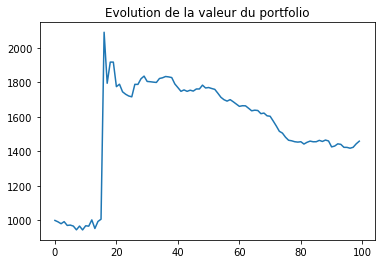

In [9]:
plt.plot(argent_fait)
plt.title("Evolution de la valeur du portfolio")
plt.show()

In [10]:
pos.round(3)

array([   0.   ,    0.   ,  321.903,    0.   ,    0.   ,    0.   ,
          0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
          0.   ,    0.   , 1000.   ,   22.038,    0.   ,    0.   ,
          0.   ,   98.254])

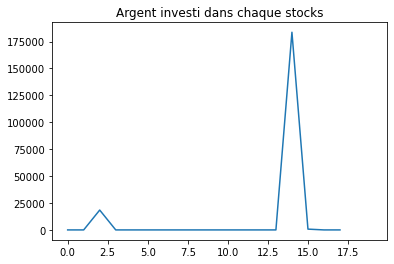

L'argent est le plus investi dans l'action: VWUSX


In [11]:
plt.plot([p.x[i] * all_stocks[-1::].values[0][i] for i in range(len(p.x))])
plt.title("Argent investi dans chaque stocks")
plt.show()
print("L'argent est le plus investi dans l'action: "+symbols[np.argmax([p.x[i] * all_stocks[-1::].values[0][i] for i in range(len(p.x))])])

In [12]:
# On a bien investi au plus Money=1000
np.dot(vp,p.x.T)

202364.35151928052

In [13]:
# Le returns avec une telle repartition de portefeuille est de:
np.sum(returns.mean()*p.x)

0.633193930750095

In [14]:
print("Nombre d'action acheté pour chaque symbols: ")
r = pd.DataFrame([symbols,p.x])
for i in range(len(symbols)):
    print(symbols[i],p.x[i].round(3))

Nombre d'action acheté pour chaque symbols: 
SPY 0.0
QQQ 0.0
VGK 321.903
SCZ 0.0
EWJ 0.0
EEM 0.0
REM 0.0
VNQ 0.0
RWX 0.0
TIP 0.0
IEF 0.0
TLT 0.0
BWX 0.0
DBC 0.0
GLD 1000.0
twtr 22.038
intc 0.0
tsm 0.0
VWUSX 0.0
Amc 98.254
